In [12]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load the dataset from Google Drive
data = pd.read_csv('/content/drive/MyDrive/CreditCard.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
# Exploring the dataset: Checking the shape, description, and missing values
data_shape = data.shape
data_description = data.describe()
missing_values = data.isnull().sum()

print("Data Shape:", data_shape)
print("\nData Description:\n", data_description)
print("\nMissing Values:\n", missing_values)

Data Shape: (1319, 12)

Data Description:
            reports          age       income        share  expenditure  \
count  1319.000000  1319.000000  1319.000000  1319.000000  1319.000000   
mean      0.456406    33.213103     3.365376     0.068732   185.057071   
std       1.345267    10.142783     1.693902     0.094656   272.218917   
min       0.000000     0.166667     0.210000     0.000109     0.000000   
25%       0.000000    25.416670     2.243750     0.002316     4.583333   
50%       0.000000    31.250000     2.900000     0.038827   101.298300   
75%       0.000000    39.416670     4.000000     0.093617   249.035800   
max      14.000000    83.500000    13.500000     0.906320  3099.505000   

        dependents       months   majorcards       active  
count  1319.000000  1319.000000  1319.000000  1319.000000  
mean      0.993935    55.267627     0.817286     6.996967  
std       1.247745    66.271746     0.386579     6.305812  
min       0.000000     0.000000     0.000000     0

In [14]:
# Identifying categorical variables
categorical_columns = ['card', 'owner', 'selfemp']

# Converting categorical variables to numerical using LabelEncoder
label_encoder = LabelEncoder()
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

# Check the first few rows to confirm the conversion
print("\nData after converting categorical variables:\n", data.head())


Data after converting categorical variables:
    card  reports       age  income     share  expenditure  owner  selfemp  \
0     1        0  37.66667  4.5200  0.033270   124.983300      1        0   
1     1        0  33.25000  2.4200  0.005217     9.854167      0        0   
2     1        0  33.66667  4.5000  0.004156    15.000000      1        0   
3     1        0  30.50000  2.5400  0.065214   137.869200      0        0   
4     1        0  32.16667  9.7867  0.067051   546.503300      1        0   

   dependents  months  majorcards  active  
0           3      54           1      12  
1           3      34           1      13  
2           4      58           1       5  
3           0      25           1       7  
4           2      64           1       5  


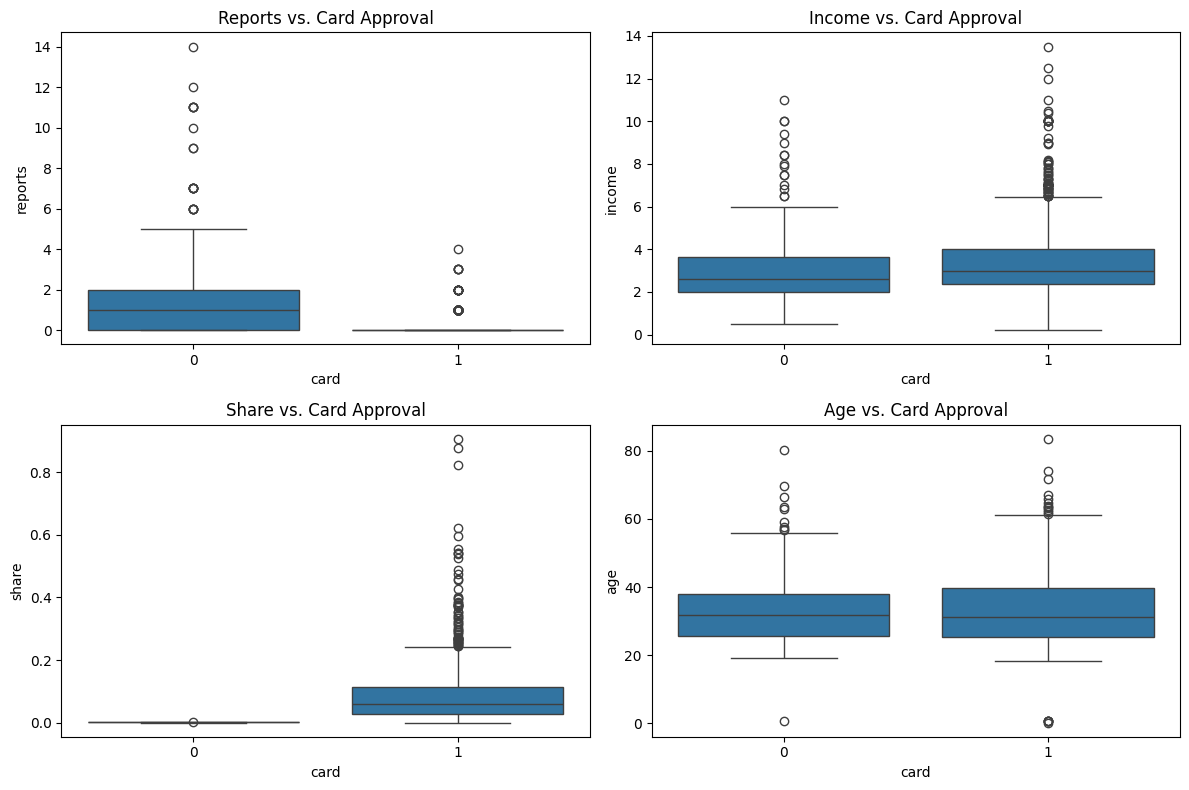

In [15]:
# Performing Exploratory Data Analysis (EDA)
# Selecting key variables for visualization
plt.figure(figsize=(12, 8))

# Plotting a boxplot for 'reports' and 'card' to see the distribution based on card approval
plt.subplot(2, 2, 1)
sns.boxplot(x='card', y='reports', data=data)
plt.title('Reports vs. Card Approval')

# Plotting a boxplot for 'income' and 'card'
plt.subplot(2, 2, 2)
sns.boxplot(x='card', y='income', data=data)
plt.title('Income vs. Card Approval')

# Plotting a boxplot for 'share' and 'card'
plt.subplot(2, 2, 3)
sns.boxplot(x='card', y='share', data=data)
plt.title('Share vs. Card Approval')

# Plotting a boxplot for 'age' and 'card'
plt.subplot(2, 2, 4)
sns.boxplot(x='card', y='age', data=data)
plt.title('Age vs. Card Approval')

# Adjust layout
plt.tight_layout()
plt.show()

In [16]:
# Building the Logistic Regression Model using sklearn

# Defining the feature variables (X) and the target variable (y)
X = data.drop(columns=['card'])  # Independent variables
y = data['card']  # Dependent variable

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Making predictions using the test set
y_pred = logistic_model.predict(X_test)

# Creating a DataFrame to compare predictions with actual values
comparison_df = X_test.copy()
comparison_df['Actual'] = y_test.values
comparison_df['Predicted'] = y_pred

print("\nLogistic Regression Prediction Comparison:\n", comparison_df.head())


Logistic Regression Prediction Comparison:
       reports       age  income     share  expenditure  owner  selfemp  \
677         0  32.58333  1.8142  0.054141     81.43500      1        0   
1046        0  23.91667  2.0000  0.100191    166.90170      0        0   
610         0  36.75000  3.0000  0.032497     80.82584      1        0   
49          0  27.75000  7.0000  0.110585    644.82830      1        0   
1284        0  49.16667  3.1144  0.008495     21.46500      1        0   

      dependents  months  majorcards  active  Actual  Predicted  
677            0       9           1      22       1          1  
1046           0       9           1       0       1          1  
610            3     134           0       4       1          1  
49             0       0           1      13       1          1  
1284           1     154           0       6       1          1  


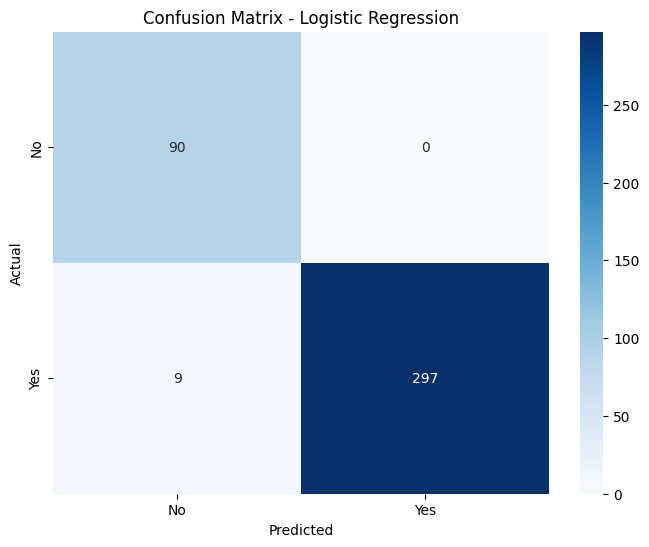


Accuracy: 0.9772727272727273
Recall: 0.9705882352941176
F1 Score: 0.9850746268656716

Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95        90
           1       1.00      0.97      0.99       306

    accuracy                           0.98       396
   macro avg       0.95      0.99      0.97       396
weighted avg       0.98      0.98      0.98       396



In [17]:
# Assessing the model's performance

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix using Seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# Calculating and displaying metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("\nAccuracy:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1)
print("\nClassification Report:\n", classification_rep)

In [22]:
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, recall_score, f1_score

# Remove highly correlated features
correlation_matrix = X_train.corr().abs()
upper_triangle = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
)
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]

# Drop the identified columns from both training and testing sets
X_train_reduced = X_train.drop(columns=to_drop)
X_test_reduced = X_test.drop(columns=to_drop)

# Standardizing the data to avoid overflow issues in statsmodels
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_reduced)
X_test_scaled = scaler.transform(X_test_reduced)

# Adding constant to the scaled training set
X_train_sm = sm.add_constant(X_train_scaled)

# Fitting the logistic regression model with statsmodels
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit(disp=0)  # disp=0 suppresses iteration messages

# Display model summary
print(result.summary())

# Prepare the scaled test data with a constant and predict
X_test_sm = sm.add_constant(X_test_scaled, has_constant='add')
y_pred_sm = result.predict(X_test_sm) > 0.5  # Convert probabilities to binary outcome

# Calculating evaluation metrics
accuracy_sm = accuracy_score(y_test, y_pred_sm)
f1_sm = f1_score(y_test, y_pred_sm)
recall_sm = recall_score(y_test, y_pred_sm)

print("Statsmodels Logistic Regression - Accuracy:", accuracy_sm)
print("F1 Score:", f1_sm)
print("Recall:", recall_sm)

                           Logit Regression Results                           
Dep. Variable:                   card   No. Observations:                  923
Model:                          Logit   Df Residuals:                      911
Method:                           MLE   Df Model:                           11
Date:                Mon, 28 Oct 2024   Pseudo R-squ.:                  0.9334
Time:                        17:22:25   Log-Likelihood:                -32.612
converged:                      False   LL-Null:                       -490.03
Covariance Type:            nonrobust   LLR p-value:                4.006e-189
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6766.8284      9e+04      0.075      0.940    -1.7e+05    1.83e+05
x1           -26.6941   9720.798     -0.003      0.998   -1.91e+04     1.9e+04
x2             0.4753      0.294      1.619      0.1

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
